壹之一、 比賽簡介：
我參加的是 "Spaceship Titanic" 這個比賽，這個比賽是其中一個 Kaggle 上推薦機器學習入門者參加的比賽，比賽的背景故事是一艘宇宙飛船在出發後與抵達第一個目的地前，遭遇了某個事件，導致飛船上部分的乘客被傳送至異次元，而留給我們的是部分從飛船上恢復的紀錄。比賽的參加者需從這些紀錄中推測飛船上的哪些乘客被傳送至異次元。

壹之二、 選擇原因：
由於我本身是機器學習的新手，同時對 python 亦不甚熟悉，故在 Kaggle 上選擇比賽時便較保守，不敢貿然挑戰太複雜的比賽，因此與上課練習過的 "Titanic生存預測" 類型相同的 "Spaceship Titanic" 便是一個不錯的選擇，又由於這個比賽提供的資料集較單純，不像我原先有興趣做的另一個比賽 "Store Sales - Time Series Forecasting" 提供大量的附加檔案(且其涉及時間序列等，故考慮可行性後將其排除)，故 "Spaceship Titanic" 便成為了我期中報告的選題。

壹之三、 資料集&目標介紹：
這個比賽提供的檔案非常單純，與 "Titanic生存預測" 一樣僅有訓練用的資料集 "train.csv"、上傳結果時使用的考試資料集 "test.csv" 與參考上傳格式用的 "sample_submission.csv"，"train.csv" 中包括了飛船上各乘客的基本資料、在飛船上的狀態及消費金額以及是否被傳送，具體的參數有以下14個，簡述如下。
1. PassengerId：每位乘客皆有一個獨特的編號，格式為 "gggg_pp" ，其中包含兩個部分，以底線分隔，前面四位數代表該乘客所在組別的編號，後面的兩位數代表該乘客在該組別中的編號，而由各乘客所在組別的最大編號可推得其同行人數。
2. HomePlanet：該乘客上船的地點，通常為其永久居住地。
3. CryoSleep：部分乘客在航行途中會處於假死狀態，並被限制在其船艙內，此參數即用以表示其是否處在假死狀態，True 代表是； False 代表否。
4. Cabin：乘客的艙位編號，格式為 "deck/num/side" ，其中 deck 及 num 包含較多無規律的不同的值，推測對預測結果較無幫助，而 side 僅有兩種可能值，對預測結果有幫助之可能性較大。
5. Destination：該乘客的目的地。
6. Age：該乘客的年齡。
7. VIP：該乘客在航程中是否付錢享受特殊的VIP服務。
8. Name：該名乘客的姓名。
9. Transported：該名乘客是否被傳送至異次元，即本競賽要預測的目標。 
10. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck：這五個參數表示該名乘客在航行途中為各種設施的額外付費。

而 "test.csv" 中則包括 Transported 之外，上述的13個參數。

本競賽的目標是以 "train.csv" 資料集中的14種參數(包括用以推測的13種及預測目標的答案)，訓練出一機器學習模型，用以推測各乘客是否被傳送至異次元，並將此模型套用至無提供答案之 "test.csv" 資料集中，獲取各乘客是否被傳送至異次元之二元預測值(True or False)。

貳之一、 實作過程

以下就產出比賽要上傳的結果所需的過程，逐步進行敘述。

Step1. 載入需使用的模組

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

Step2. 載入資料集並觀察

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


由上面兩個結果可得知，除了 Age 和 五種設施的額外付費(即 RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)是純粹的數字，可以直接用以預測外，其餘像 "PassengerId" 及 "Cabin" 等參數都需經過不同的處理，轉換成可使用或較具意義的型式。下方即先就參數 "Cabin" 進行處理。

Step3. 參數的前處理

Step3-1. 參數 "Cabin" 的前處理

由於 參數 "Cabin" 中包含的三個資訊皆可能與預測結果有關，但其原本的格式難以使用，故先將其拆分成三個欄位，並整合進原先的資料 ( df ) 中。這裡使用指令 "str.split"，將參數 "Cabin" 以 "/" 為界，拆成三個參數，分別對應至參數 "deck"、"num" 及 "side"。再用指令 "merge" 將這三個處理過的欄位整合回原先的資料集(df)中。

In [4]:
df2 = df['Cabin'].str.split('/', expand = True)
df2.columns = ['deck','num','side']
df = pd.merge(df, df2, right_index = True, left_index = True)

由於 Cabin 已被拆解成另外三個欄位，其本身由於格式複雜亦無法用以預測結果，故將欄位 Cabin 丟棄。

In [5]:
df.drop(['Cabin'], axis = 1, inplace = True)

由於組別與同組人數皆可能與預測結果有關，但資訊藏在 PassengerId 中，故須先對其進行處理。

Step3-2. 參數 "PassengerId" 的前處理

先將 PassengerId 拆成兩個欄位，分別是代表 Group Number 的 GN 及代表 Number Of People in the group 的 NOP，並使用下方的 for 迴圈將所有在同組內的乘客的參數 "NOP" 的數值改成該組的總人數(原資料給的是該名乘客在該組的編號)。

In [6]:
df3 = df['PassengerId'].str.split('_', expand = True)
df3.columns = ['GN','NOP'] 
df3[['GN','NOP']] = df3[['GN','NOP']].astype(str).astype(int)
length = len(df3['GN'])

for i in range(0,length-1):
    if df3['NOP'][length-1-i] >= 2:
        df3['NOP'][df3.index[df3['GN'] == df3['GN'][length-1-i]]] = df3['NOP'][length-1-i]

註：此 "for迴圈" 的邏輯如下
1. 由於在競賽給的資料集中，PassengerId 是照順序排列的，即同組中編號較大的排在較後面，故為了先看到各組中的組內編號(即參數 "NOP")的最大值(亦即該組的總人數)，故此 "for迴圈" 中的 index 是 "length-1-i" ，即由此欄的最後面往前看。
2. 由於同組的乘客，其 Group Number(即參數 "GN") 相同，故以指令 "index" 找出與各組排在欄位最後(即參數 "NOP" 最大者)的參數 "GN" 相同者，並將其參數 "NOP" 的數值皆改成該組 "NOP" 的最大值。
3. 對於單人一組之乘客，由於其參數 "NOP" 本來就與組內人數相同(皆為1)，故以 "if" 進行是否需做上述參數置換的判斷。
4. 經過此置換後，所有乘客的參數 "NOP" 皆能代表其同行者(包括自己)的人數。

將處理過的資料集( df3 ) 與原先的資料集( df )進行整合，並將已被取代的欄位 PassengerId 丟棄。

In [7]:
df = pd.merge(df, df3, right_index = True, left_index = True)
df.drop(['PassengerId'], axis = 1, inplace = True)

Step4. 參數缺失值的處理

Step4-1. 確認資料中是否有缺失值(NaN)

In [8]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck            199
num             199
side            199
GN                0
NOP               0
dtype: int64

從上方的結果可知，大部分欄位皆有缺失值，而含有缺失值的欄位可分為以下四種:
1. 只含有 True 及 False 的，包括 CryoSleep 及 VIP
2. 只含有數值的，包括 Age、RoomService、FoodCourt、ShoppingMall、Spa、VRDeck 及 num
3. 只含有特定幾種字串的，包括 HomePlanet、Destination、deck 及 side
4. 其他，包括 Name(完全沒有規則)

其中，除了 Name 對預測結果較無幫助，之後會丟棄，故不用處理外，其他的缺失值都要想辦法補齊。
下方先處理 HomePlanet 及 Destination 中的缺失值。

Step4-2. 處理各參數的缺失值

Step4-2-1. 處理參數 "HomePlanet" 的缺失值

確認 HomePlanet 包括什麼

In [9]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

由上方結果可知，HomePlanet 包含三種可能的值，由於值 "Earth" 占了總量的一半，並且為數量第二多的 "Europa" 的兩倍以上，又我猜測 "HomePlanet" 這個參數不太影響預測結果，故將 HomePlanet 中的缺失值，簡單地以該欄位的眾數(即 Earth)補齊。

In [10]:
df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(),inplace=True)

Step4-2-2. 處理參數 "Destination" 的缺失值

確認 Destination 中包括什麼

In [11]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

由上方結果可知，Destination 亦包含三種可能的值，由於值 "TRAPPIST-1e" 占比高於總數的三分之二，又我猜測 "Destination" 這個參數對預測結果的影響不大，故將 Destination 中的缺失值，簡單地以該欄位的眾數(即 TRAPPIST-1e)補齊。

In [12]:
df['Destination'].fillna(df['Destination'].value_counts().idxmax(),inplace=True)

接著處理只包含 True 及 False 的欄位 ( 即 CryoSleep 及 VIP ) 中的缺失值。

Step4-2-3. 處理參數 "CryoSleep" 及 "VIP" 的缺失值

先觀察這兩個欄位

In [13]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

由上方結果可看出，對於欄位 CryoSleep，由於兩種情況的占比相差不大，故將資料缺失以本欄位的平均數補齊，以避免影響預測。這裡使用指令 "astype" 將本欄位中的 "True" 及 "False" 轉換成純數字 1 及 0，以進行平均數的計算。

In [15]:
df['CryoSleep'].fillna(df['CryoSleep'].astype(float).mean(),inplace=True)

由上方結果可看出，對於欄位 VIP，由於 False 的機率遠大於True，故缺失值可直接用 False 補齊，對預測結果及模型的訓練應該不會有太大影響。

In [16]:
df['VIP'].fillna(df['VIP'].value_counts().idxmax(),inplace=True)

接下來，處理只包含數值的欄位 ( 即 "Age"、"RoomService"、"FoodCourt"、"ShoppingMall"、"Spa" 及 "VRDeck" ) 中的缺失值。

Step4-2-4. 處理參數 "Age"、"RoomService"、"FoodCourt"、"ShoppingMall"、"Spa" 及 "VRDeck" 的缺失值

由於這些參數包含許多無規律的數值，故為了避免影響預測結果，將各欄位的缺失值以其各自的平均數進行填補。

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['RoomService'].fillna(df['RoomService'].mean(), inplace = True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace = True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
df['Spa'].fillna(df['Spa'].mean(), inplace = True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace = True)

最後，處理由欄位 Cabin 分出的三個欄位(即 "deck"、"num" 及 "side")中的缺值。

Step4-2-5. 處理參數 "deck"、"num" 及 "side" 的缺失值

先觀察這三個欄位

In [18]:
df['deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

由於參數 "deck" 的值是有限的8種，而數量最多的前兩種值 ( 即 "F" 與 "G" ) 的數量差不多，其缺值不太好補，故我將其缺值亦視為一種值。而由於之後要進行的轉換，其缺值可以不補齊，待之後將此欄位轉換成8種值的(0,1)後，不丟棄代表任何一種值的欄位，則8種欄位皆為0的即為缺值。

In [19]:
df['num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: num, Length: 1817, dtype: int64

由上面的結果可得知，參數 "num" 的值雖為有限多種，但數量最多的值亦只佔整體比例的不到1%，故可視其為無規則的數值，缺失值應以該欄位的平均數填補，以避免影響預測結果。但其資料型態並非純數字，故須先將其資料型態先轉成純數字，但當資料中有缺失值時無法順利轉換，故先將缺失值填成原資料中不存在的數值 "-1"，待資料格式轉換後再將值為 "-1" 的換成該欄位的平均數。

將缺失值先換成 -1

In [20]:
# df['num'].fillna(-1,inplace=True)

將欄位 num 的資料格式轉成整數，並將欄位 num 中的缺失值以 num 的平均數填補

In [21]:
# df['num'] = df['num'].astype(str).astype(int)
# df['num'][df.index[df['num'] == -1]] = df['num'].mean()

註：由於後續測試發現，加入欄位 "num" 並不會讓預測結果變好 ( 代表 "num" 中無規則的值與結果預測之關係甚小或無關連 )，故後續會將欄位 "num" 移除，而其缺值亦不需處理，因此將上面三行程式碼移除。

In [22]:
df['side'].value_counts()

S    4288
P    4206
Name: side, dtype: int64

由上面的結果可得知對於欄位 "side"，兩種情況的占比相差不大，故將資料缺失視為第三種情況，並設為 N。

將缺失值設為 "N"

In [23]:
df['side'].fillna("N",inplace=True)

由於預測模型在訓練即判斷時只能吃數值，故須將含字元或字串的欄位( HomePlanet、Destination、side、CryoSleep、VIP 及Transported )轉換成數值。

Step5. 將含有字元或字串的欄位轉換成純數字

Step5-1. 欄位 "HomePlanet" 的轉換

將 HomePlanet 轉換成 HomePlanet_Earth(0,1), HomePlanet_Europa(0,1)及 HomePlanet_Mars(0,1)

In [24]:
df = pd.get_dummies(data = df, columns = ['HomePlanet'])

由於從欄位 HomePlanet_Earth 及 HomePlanet_Europa 可推出 HomePlanet_Mars 的狀態，故將欄位 HomePlanet_Mars 丟棄。

丟棄欄位 "HomePlanet_Mars"

In [25]:
df.drop(['HomePlanet_Mars'], axis = 1, inplace = True)

Step5-2. 欄位 "Destination" 的轉換

將 Destination 轉換成三個目的地分別的(0,1)

In [26]:
df = pd.get_dummies(data = df, columns = ['Destination'])

由前兩個目的地的狀態可推出最後一個目的地的狀態，故將最後一個目的地的欄位丟棄。

丟棄欄位 "Destination_TRAPPIST-1e"

In [27]:
df.drop(['Destination_TRAPPIST-1e'], axis = 1, inplace = True)

Step5-3. 欄位 "side" 的轉換

將 side 轉換成 S(0,1)、P(0,1)及 N(0,1)，分別對應是否為 Starboard、Port 及 NaN

In [28]:
df = pd.get_dummies(data = df, columns = ['side'])

由 side_S 及 side_P 的狀態可以推出 side_N 的狀態，故將欄位 side_N 丟棄。

丟棄欄位 "side_N"

In [29]:
df.drop(['side_N'], axis = 1, inplace = True)

Step5-4. 欄位 "deck" 的轉換

將 deck 轉換成八種情況分別的(0,1)，並將八種情況的欄位都保留，而八種情況都為 0 的乘客即代表當初是缺失值

In [30]:
# df = pd.get_dummies(data = df, columns = ['deck'])

註：由於加入欄位 "deck" 後，預測的結果並沒有變好(甚至變差，故判斷欄位 "deck" 與結果預測之關聯性甚小或無關聯)，故後續將其捨棄，而上面那行程式碼亦移除。

Step5-5. 欄位 "CryoSleep"、"VIP" 及 "Transported" 的轉換

將所有包含 ( True, False ) 的欄位轉換成 ( 1, 0 )

In [31]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

將所有用以預測結果的欄位所需的處理 ( 前處理、補缺值及數值化 )做完後，要做的便是將用不到的欄位丟棄。

Step6. 移除用不到的資料，即參數 "Name", "deck" 及 "num" 的欄位

移除欄位 "Name", "deck" 及 "num"

In [32]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,GN,NOP,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_PSO J318.5-22,side_P,side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,1,1,0,1,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,2,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,3,2,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,3,2,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,4,1,1,0,0,0,0,1


In [33]:
df.drop(['Name', 'deck', 'num'], axis = 1, inplace = True)

Step7. 定義想預測的變數 ( 即 Transported ) 及用以預測的變數

將用以預測結果的參數 ( 即欄位 "CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "GN", "NOP", "HomePlanet_Earth", "HomePlanet_Europa", "Destination_55 Cancri e", "Destination_PSO J318.5-22", "side_P" 及 "side_S") 丟進變數 "X" 中，並將預測的結果 ( 即欄位 "Transported" ) 丟進變數 "y" 中

In [34]:
X = df.drop(['Transported'], axis = 1)
y = df['Transported']

Step8. 將資料分割成訓練用及測試用

將資料集分割成訓練用 ( 即 "X_train" 與 "y_train" ) 及測試用 ( 即 "X_test" 與 "y_test" ) 的，而訓練用的佔原資料集的70%，測試用的則佔30%

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 67)

Step9. 載入Logistic regression model 並訓練及測試用以預測此競賽結果的模型

載入 Logistic regression model，設定最大遞迴次數為400次，並訓練及測試用以預測結果的模型

In [36]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter = 400)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

Step10. 檢驗訓練好的模型的準確度

載入各種用以檢驗模型精確度的指標模組，並檢驗模型精確度

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
accuracy_score(y_test,predictions)

0.8017638036809815

In [38]:
recall_score(y_test,predictions)

0.8323170731707317

In [39]:
precision_score(y_test,predictions)

0.7861771058315334

模型的準確度還不錯，有0.8左右的準確率。

Step11. 將訓練好的模型包裝成壓縮檔

將訓練好的模型包裝成壓縮檔 "Spaceship_Titanic-LR.pkl"

In [40]:
import joblib
joblib.dump(lr, 'Spaceship_Titanic-LR.pkl', compress = 3)

['Spaceship_Titanic-LR.pkl']

Step12. 匯入訓練好的模型，並生成對上傳結果用的資料集 ( 即 "test.csv" ) 的預測結果

匯入訓練好的模型 "Spaceship_Titanic-LR.pkl"

In [41]:
model_pretrained = joblib.load('Spaceship_Titanic-LR.pkl')

匯入上傳預測結果需使用的資料集

In [42]:
dft = pd.read_csv("test.csv")

保留 PassengerId，後續產生上傳檔案時會用到

In [43]:
PassengerId = dft['PassengerId']

對各項參數進行所有需要之處理

In [44]:
dft2 = dft['Cabin'].str.split('/', expand = True)
dft2.columns = ['deck','num','side']
dft = pd.merge(dft, dft2, right_index = True, left_index = True)
dft.drop(['Cabin'], axis = 1, inplace = True)
dft3 = dft['PassengerId'].str.split('_', expand = True)
dft3.columns = ['GN','NOP'] 
dft3[['GN','NOP']] = dft3[['GN','NOP']].astype(str).astype(int)
length = len(dft3['GN'])

for i in range(0,length-1):
    if dft3['NOP'][length-1-i] >= 2:
        dft3['NOP'][dft3.index[dft3['GN'] == dft3['GN'][length-1-i]]] = dft3['NOP'][length-1-i]

dft = pd.merge(dft, dft3, right_index = True, left_index = True)
dft.drop(['PassengerId'], axis = 1, inplace = True)
dft['HomePlanet'].fillna(dft['HomePlanet'].value_counts().idxmax(),inplace=True)
dft['Destination'].fillna(dft['Destination'].value_counts().idxmax(),inplace=True)
dft['VIP'].fillna(dft['VIP'].value_counts().idxmax(),inplace=True)
dft['CryoSleep'].fillna(df['CryoSleep'].astype(float).mean(),inplace=True)
dft['Age'].fillna(dft['Age'].mean(), inplace = True)
dft['RoomService'].fillna(dft['RoomService'].mean(), inplace = True)
dft['FoodCourt'].fillna(dft['FoodCourt'].mean(), inplace = True)
dft['ShoppingMall'].fillna(dft['ShoppingMall'].mean(), inplace = True)
dft['Spa'].fillna(dft['Spa'].mean(), inplace = True)
dft['VRDeck'].fillna(dft['VRDeck'].mean(), inplace = True)
dft['side'].fillna("N",inplace=True)
dft = pd.get_dummies(data = dft, columns = ['HomePlanet'])
dft.drop(['HomePlanet_Mars'], axis = 1, inplace = True)
dft = pd.get_dummies(data = dft, columns = ['Destination'])
dft.drop(['Destination_TRAPPIST-1e'], axis = 1, inplace = True)
dft = pd.get_dummies(data = dft, columns = ['side'])
dft.drop(['side_N'], axis = 1, inplace = True)
dft['CryoSleep'] = df['CryoSleep'].astype(int)
dft['VIP'] = df['VIP'].astype(int)
dft.drop(['Name', 'deck', 'num'], axis = 1, inplace = True)


套用模型以生成預測結果

In [45]:
predictions2 = model_pretrained.predict(dft)

Step13. 將預測結果轉換成上傳的格式，並輸出用以上傳結果的檔案

參考競賽網站上提供的範本，將預測結果轉換成上傳的格式，並輸出用以上傳結果的檔案 "for_submission.csv"

In [46]:
forSubmissionDF = pd.DataFrame(columns = ['PassengerId', 'Transported'])
forSubmissionDF['PassengerId'] = PassengerId
forSubmissionDF['Transported'] = predictions2.astype(bool)
forSubmissionDF.to_csv('for_submission.csv', index = False)

檔案 "for_submission.csv" 的長相如下圖，與 Kaggle 上提供的上傳檔案格式相同。

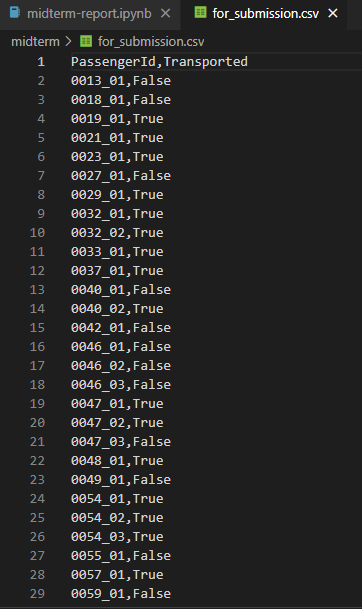

以上就是所有實作過程。接下來要做的就是將預測結果上傳至Kaggle並取得成績了。

貳之二、 延伸學習的部分

在生成這個競賽的結果的過程中，我延伸學習了以下幾個 python 中的指令。
1. str.split：用以將內含特殊字符 (如 "_" 或 "/" 等) 的字串依特殊字符為分界拆解成數個部分。在此競賽中我使用這個指令使資料集中原本無法使用的資料欄位，如 "Cabin" 及 "PassengerId" 切成數個部分，經後續處理後轉變成可使用的參數。
2. pd.merge：用以將兩個 dataframe 合併成一個 dataframe，以利使用。
3. astype：將資料型態轉變成目標資料型態，在這個競賽中即為純數字 ( "int" 或 "float" ) 或 布林值 ( "bool" )，在此競賽中用以配合 "str.split" 使資料集中無法用以訓練模型的資料純數字化、進行布林值與 (0, 1) 間的轉換等。
4. index：用以找到矩陣中符合條件的位址，在此競賽中用以進行 "組內編號" 與 "同行人數" 間的代換。

參之一、 比賽結果

下方是由上述的實作過程得到預測結果後，上傳 Kaggle 取得的成績

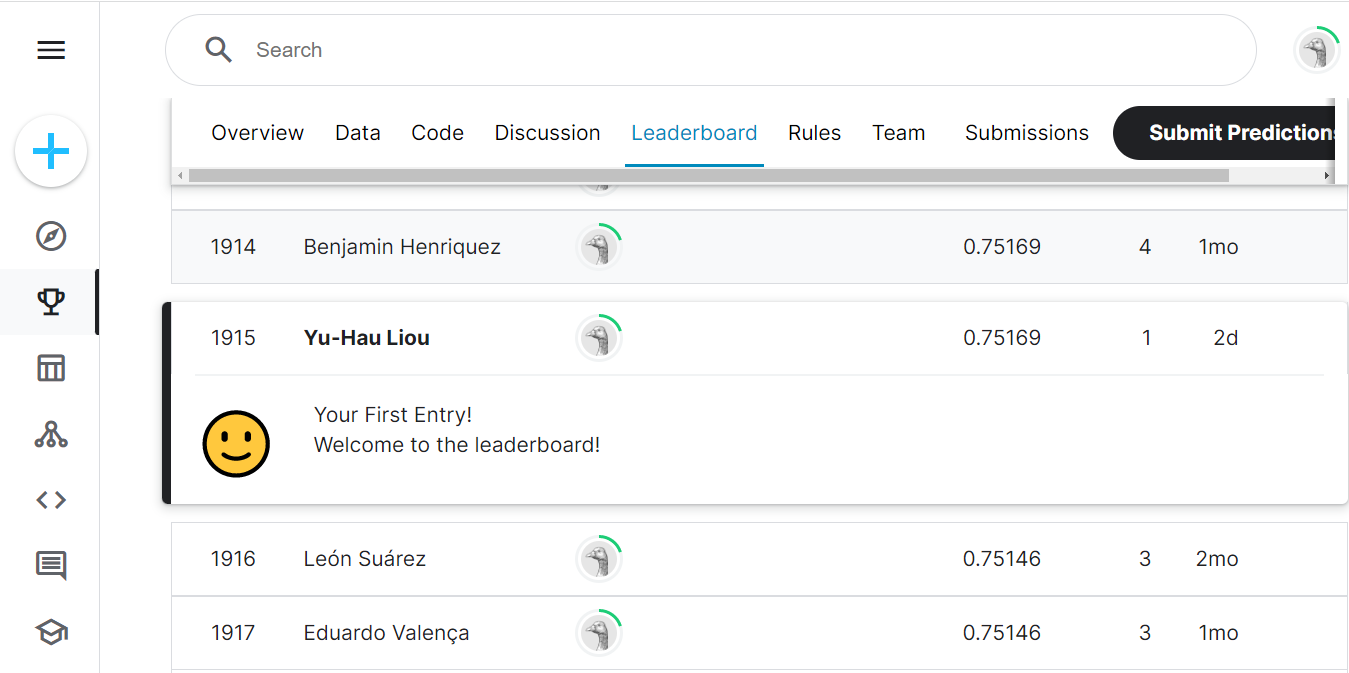

下方的截圖是加入欄位 "deck" 進行預測所得的結果，可以看到雖然資訊看似變多了，但結果卻並沒有變好，反倒變差了，這代表欄位 "deck" 對於預測結果不但不是有用的資訊，反倒會混亂模型的預測。

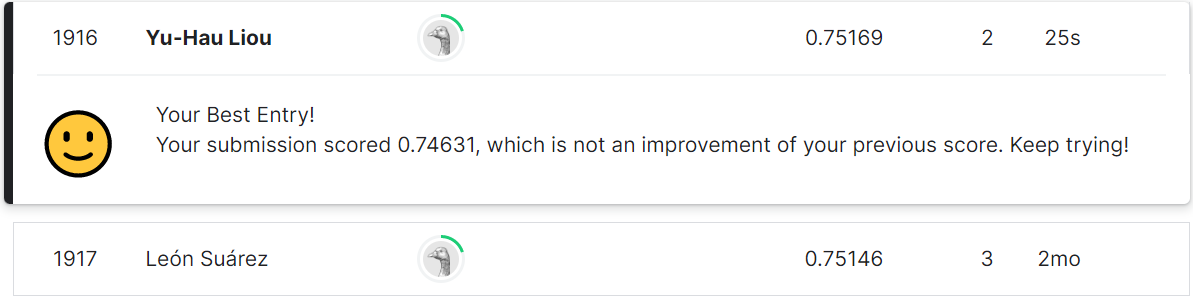

下方的截圖是加入欄位 "num" 進行預測所得的結果，可以看到雖然資訊看似變多了，但結果卻並沒有變好，反倒變差了，這代表欄位 "num" 對於預測結果不但不是有用的資訊，反倒會混亂模型的預測。

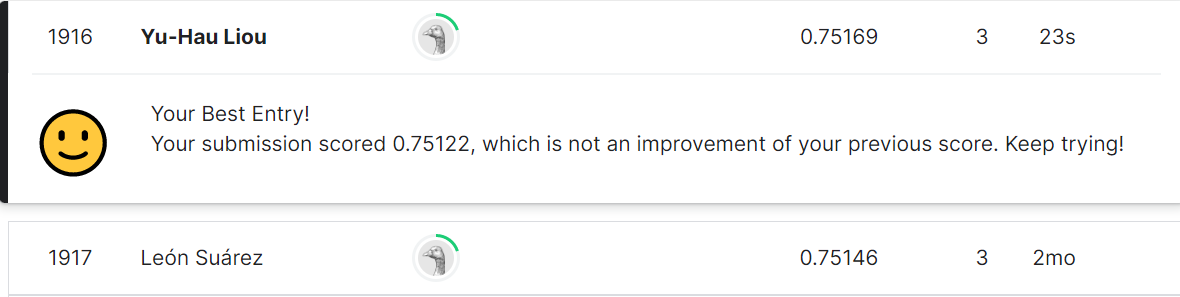

上面三個上傳結果得到的成績間的關係，基本上與我自己用 "accuracy_score", "recall_score" 及 "precision_score" 這三個模組得到的準確值的大小關係相同，符合預期。

在上述的實作過程的基礎上，我又嘗試分別將所有有用以預測結果的欄位丟棄，檢查是否有像欄位 "deck" 及 "num"，會混淆模型預測的欄位，但以上述三個模組得到的準確值都沒有再變更好，故推測上述實作過程保留以訓練模型的欄位應該皆有助於預測結果。

參之二、 可能的改善

從上述的測試結果可得知，單純從挑選預測結果使用的欄位應該已經很難再提升預測的精確度，但除此之外一定還有其他方式可以提升預測的精確度，以下是我想到的三個可能的方式。

1. 以某些明顯具有閥值的欄位導出一新欄位，用以表示該乘客在該欄位的數值是否超過該閥值，並將此新欄位加入原資料集，用以預測結果。說明如下。

In [47]:
df = pd.read_csv("train.csv")
df['Transported'] = df['Transported'].astype(int)

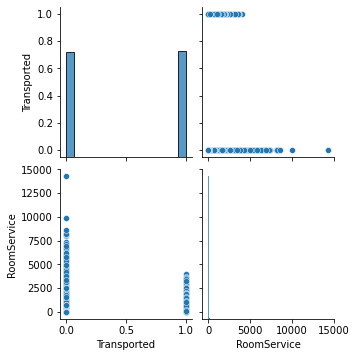

In [48]:
sns.pairplot(df[['Transported','RoomService']], dropna = True)

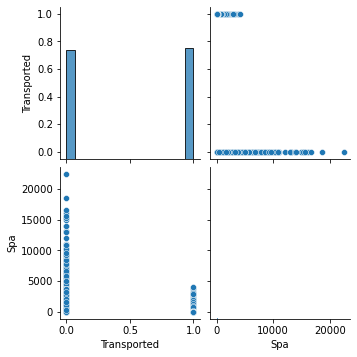

In [49]:
sns.pairplot(df[['Transported','Spa']], dropna = True)

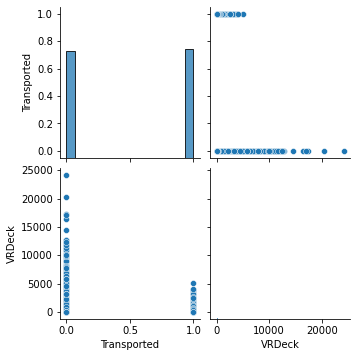

In [50]:
sns.pairplot(df[['Transported','VRDeck']], dropna = True)

由上面的三個結果可以看出，在欄位 "RoomService", "Spa" 或 "VRDeck" 超過一定的值後，對應的 "Transported" 皆為零，代表在這些欄位個別的數值超過一特定值即不會被傳送。故或許可以將這些欄位是否超過其特定值作為一新欄位的狀態，例如對於在欄位 "RoomService" 超過特定值的乘客，其在新欄位 "RoomService_exceed"，的狀態便為 1，反之則為 0。並將新欄位 "RoomService_exceed" 加入原資料集，用以預測結果。

2. 每位乘客在特定幾個欄位狀態的組合，可能對預測結果亦會有幫助。如以 "RoomService" 與 "Spa" 的加總值或 "RoomService" 與 "VRDeck" 的相差值作為一新欄位的值，並將此新欄位加入原資料集，作為預測結果的參數之一，或許能提升結果預測的準確度。而此種狀態的組合，可能不以數值計算為限，亦有機會是較複雜的判斷式。

3. 在貳之一描述的實作過程中，對缺值的處理皆以不影響結果的預測為準(這裡指的影響是不好的影響)，但或許存在某種方式，可以更合理地處理缺值，使其不僅僅是不影響結果預測，更能對該乘客的結果預測有幫助。例如找出乘客在各欄位的狀態的關聯，並在有缺值時以此關聯配合該乘客其他欄位的狀態，進行更佳的缺值填補。